In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import re

import seaborn as sns
import matplotlib.pyplot as plt
import datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/WEB SCRAPING 101/Data Cleaned_new.csv')

In [ ]:
data.head()

,job_title,company_name,date_posted,date_scraped,seniority_level,employment_type,work_place,industries,state,country,company_size,company_followers,total_applicants,job_link,job_description
0,Data Science Trainee,Algoritma Data Science School,2023-07-01,2023-8-3,Internship,Full-time,Onsite,Education Administration Programs,DKI Jakarta,Indonesia,11-50 Employee,11560,155,https://id.linkedin.com/jobs/view/data-science...,Background Are you looking to build a career i...
1,Data Intelligence Intern,SIRCLO,2023-08-02,2023-8-3,Internship,Full-time,Hybrid,IT Services and IT Consulting,Banten,Indonesia,1001-5000 Employee,67415,126,https://id.linkedin.com/jobs/view/data-intelli...,nullResponsibilities SIRCLO Internship Program...
2,Business Analyst (intern),Kawan Lama Group,2023-07-24,2023-8-3,Internship,Internship,Onsite,Retail,DKI Jakarta,Indonesia,10001+ Employee,150260,292,https://id.linkedin.com/jobs/view/business-ana...,Gambaran Pekerjaan Melakukan analisa data terk...
3,Business Intelligence Analyst Intern,Flash Coffee,2023-06-27,2023-8-3,Internship,Internship,Onsite,"Technology, Information and Internet",DKI Jakarta,Indonesia,501-1000 Employee,30563,228,https://id.linkedin.com/jobs/view/business-int...,Flash Coffee is one of Asia's fastest-growing ...
4,Data Scientist Intern,Amartha,2023-07-27,2023-8-3,Internship,Full-time,Hybrid,Financial Services,DKI Jakarta,Indonesia,5001-10000 Employee,64041,184,https://id.linkedin.com/jobs/view/data-scienti...,nullResponsibilities Complete ad hoc data requ...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18310 entries, 0 to 18309
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job_title          18310 non-null  object
 1   company_name       18310 non-null  object
 2   date_posted        18310 non-null  object
 3   date_scraped       18310 non-null  object
 4   seniority_level    18310 non-null  object
 5   employment_type    18310 non-null  object
 6   work_place         18310 non-null  object
 7   industries         18310 non-null  object
 8   state              18310 non-null  object
 9   country            18310 non-null  object
 10  company_size       18310 non-null  object
 11  company_followers  18310 non-null  int64 
 12  total_applicants   18310 non-null  int64 
 13  job_link           18310 non-null  object
 14  job_description    18310 non-null  object
dtypes: int64(2), object(13)
memory usage: 2.1+ MB


In [ ]:
data['date_posted'] = pd.to_datetime(data['date_posted'])
data['date_scraped'] = pd.to_datetime(data['date_scraped'])
data.drop(['job_link', 'job_description'], axis=1, inplace=True)

data['applicant_perday'] = (data['date_scraped'] - data['date_posted']).dt.days
data['applicant_perday'] = data['total_applicants'] / data['applicant_perday']
data.applicant_perday.fillna(0, inplace=True)
data.applicant_perday.replace(np.inf, 0, inplace=True)
#data['applicant_perday'] = data['applicant_perday'].astype('int')

data['day_of_week'] = data['date_posted'].dt.dayofweek

In [ ]:
# function for plotting graph

def create_plot(dataframe, x, y):
  value1 = dataframe[x]
  value2 = dataframe[y]

  fig, ax = plt.subplots(figsize =(11, 6))

  ax.barh(value1, value2)


  for s in ['top', 'bottom', 'left', 'right']:
      ax.spines[s].set_visible(False)

  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')

  ax.xaxis.set_tick_params(pad = 5)
  ax.yaxis.set_tick_params(pad = 10)

  ax.invert_yaxis()

  for i in ax.patches:
      plt.text(i.get_width()+0.2, i.get_y()+0.5,
              str(round((i.get_width()), 2)),
              fontsize = 8, fontweight ='bold',
              color ='grey')



  return ax

## Looking at Job Posting based on day

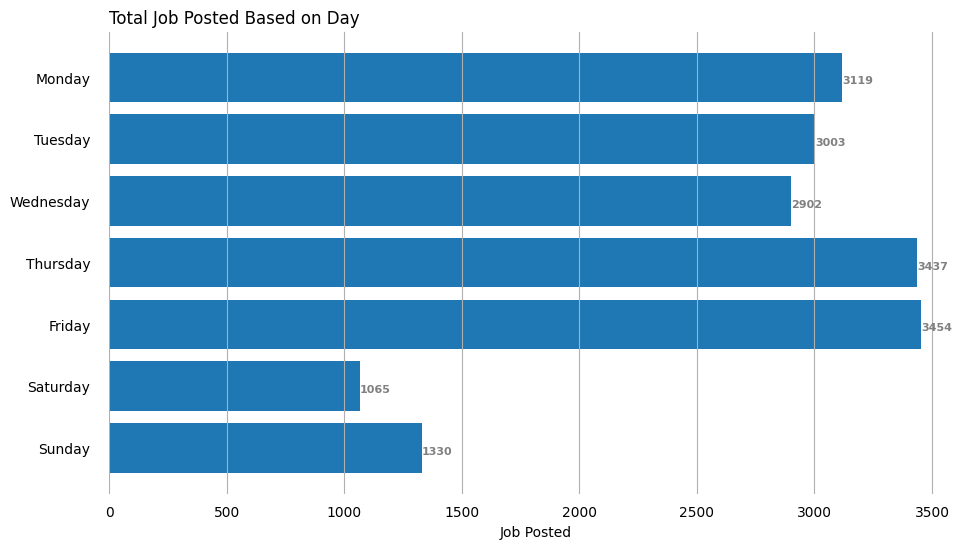

In [ ]:
day = data.groupby('day_of_week')['date_posted'].count().reset_index().rename(columns={'date_posted' : 'job_posted'})

ax = create_plot(day, 'day_of_week', 'job_posted')

xtick = ["","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax.set_yticklabels((xtick))
ax.set_title('Total Job Posted Based on Day', loc ='left', )
ax.set_xlabel('Job Posted')

plt.grid(axis='x')
plt.show()


**Findings**

Thursday has the highest number of job postings with 3437 postings. Saturday has the fewest number of job postings with only 1065 postings.

Weekend vs. Weekday Postings:
- Combining Saturday and Sunday, we can see that the weekend has a total of 2395 job postings, which is significantly lower than the total for the weekdays, which has a combined total of 15045 job postings.

Job Posting Trends:
- Job postings generally increase from Monday to Thursday, with a peak on Thursday.
- Job postings drop significantly over the weekend .

**Recomendation**

These findings can provide valuable insights for job seekers, indicating that it's more advantageous to explore the platform on weekdays, as job postings are significantly higher compared to the weekend.

## Looking at Total Applicants based on Employment Type

<Axes: ylabel='Density'>

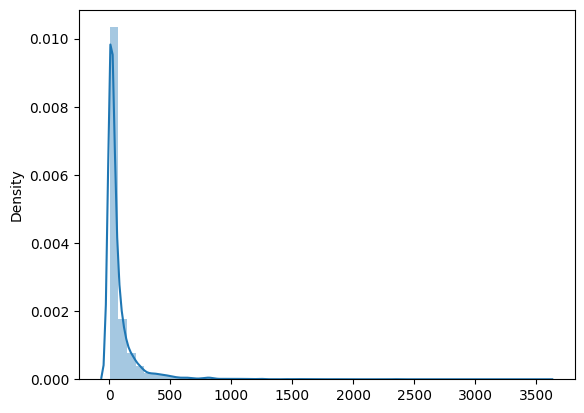

In [ ]:
sns.distplot(data, x=data.loc[data['total_applicants']>0]['total_applicants'])

<Axes: ylabel='Density'>

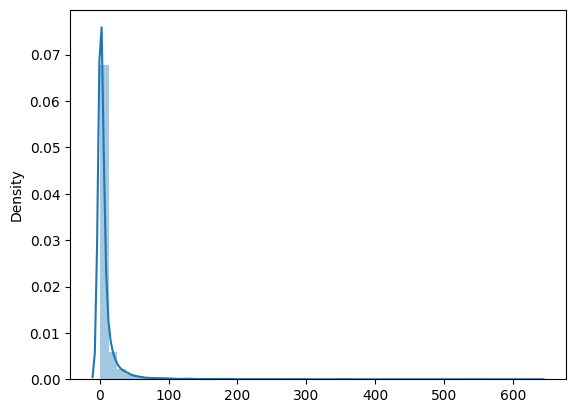

In [ ]:
sns.distplot(data, x=data['applicant_perday'])

In [ ]:
emp_type = data.loc[data['employment_type'] != 'Unidentified'].groupby('employment_type')['total_applicants'].sum().reset_index().sort_values(by='total_applicants', ascending=False)
emp_type

,employment_type,total_applicants
1,Full-time,1134396
0,Contract,78139
2,Internship,50392
4,Part-time,7540
3,Other,559


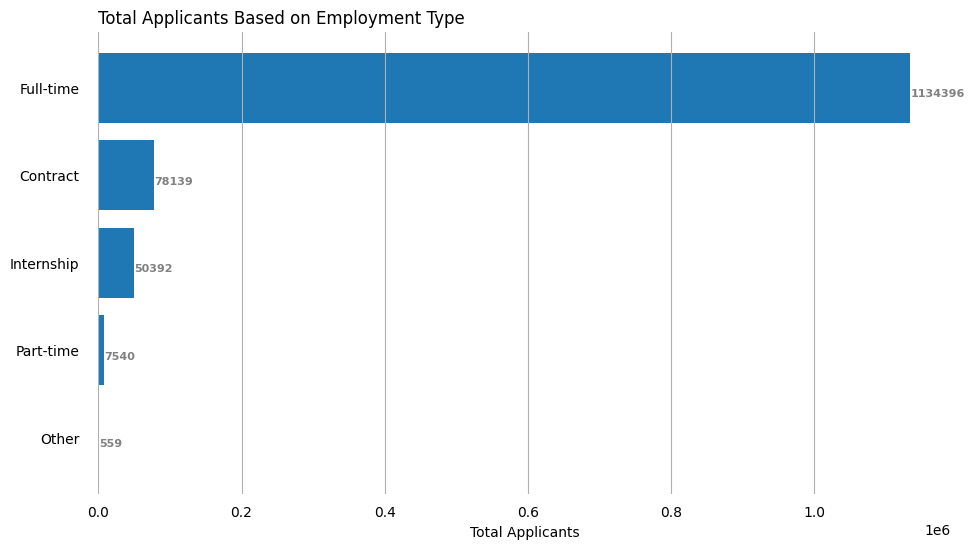

In [ ]:
ax = create_plot(emp_type, x='employment_type', y='total_applicants')

xtick = ["Full-time", "Contract", "Internship", "Part-time", "Other"]
ax.set_yticklabels((xtick))
ax.set_title('Total Applicants Based on Employment Type', loc ='left', )
ax.set_xlabel('Total Applicants')

plt.grid(axis='x')
plt.show()

**Findings**

- Full-time positions received the highest number of applicants, with 1,134,396 applicants. This indicates that there is substantial competition for these roles.
- Internship positions attracted a significant number of applicants. This suggests that many job seekers are interested in gaining practical experience.

**Insights**

- Given the high competition for full-time positions, job seekers should tailor their resume, cover letter, and interview responses to highlight relevant skills and experiences.

- Don't limit your job search to only full-time positions. Consider contract, internship, and part-time roles, especially if you are looking to gain experience or explore different industries.

- If you're a student or recent graduate, consider pursuing internship opportunities to build practical skills and expand your network.

**Recommendations**

- Customize your job applications to match the specific requirements and qualifications of each role.

- Actively network with professionals in your field of interest, attend industry events, and participate in workshops or online courses.

- Be open to different types of employment arrangements, such as contract or part-time work, especially if you are early in your career. These roles can provide valuable experience and may lead to full-time opportunities.

## Looking at Seniority Level distribution based on Company Size

In [ ]:
data.company_size.value_counts().index

Index(['10001+ Employee', '1001-5000 Employee', '11-50 Employee',
       '51-200 Employee', 'No Data', '201-500 Employee', '5001-10000 Employee',
       '501-1000 Employee', '1-10 Employee'],
      dtype='object')

In [ ]:
size_dict = {
    '10001+ Employee' : 'Big Company',
    '5001-10000 Employee' : 'Big Company',
    '1001-5000 Employee' : 'Medium-Big Company',
    '501-1000 Employee' : 'Medium-Big Company',
    '201-500 Employee' : 'Medium Company',
    '51-200 Employee' : 'Medium Company',
    '11-50 Employee' : 'Small Company',
    '1-10 Employee' : 'Small Company',
    'No Data' : 'No Data'
}

In [ ]:
def comp_resize(x, dict=size_dict):
  return size_dict[x]

In [ ]:
data['comp_category'] = data['company_size'].apply(comp_resize)
data.loc[data['seniority_level'] == 'Director', 'seniority_level'] = 'Mid-Senior level'
data.seniority_level.value_counts(), data.comp_category.value_counts()

(Entry level         9654
 Mid-Senior level    8055
 Internship           601
 Name: seniority_level, dtype: int64,
 Big Company           5387
 Medium-Big Company    4229
 Medium Company        3766
 Small Company         3342
 No Data               1586
 Name: comp_category, dtype: int64)

In [ ]:
comp_group = data.loc[data['comp_category'] != 'No Data'].groupby(['comp_category', 'seniority_level']).count().unstack()['job_title']
comp_group = comp_group.reindex(["Big Company", "Medium-Big Company", "Medium Company", "Small Company"])
comp_group

seniority_level,Entry level,Internship,Mid-Senior level
comp_category,,,
Big Company,2461,178,2748
Medium-Big Company,2283,80,1866
Medium Company,1853,128,1785
Small Company,1893,105,1344


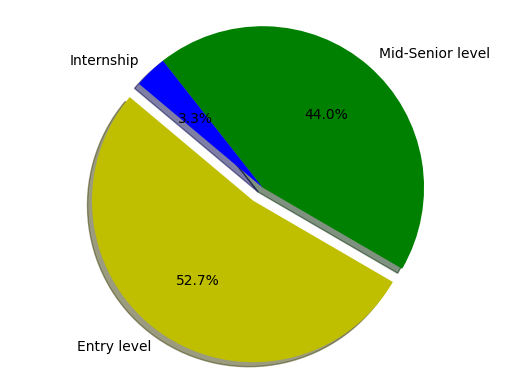

In [ ]:
# Data to plot
labels = 'Entry level', 'Mid-Senior level', 'Internship'
sizes = data.seniority_level.value_counts().tolist()
colors = ['y', 'g', 'b']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

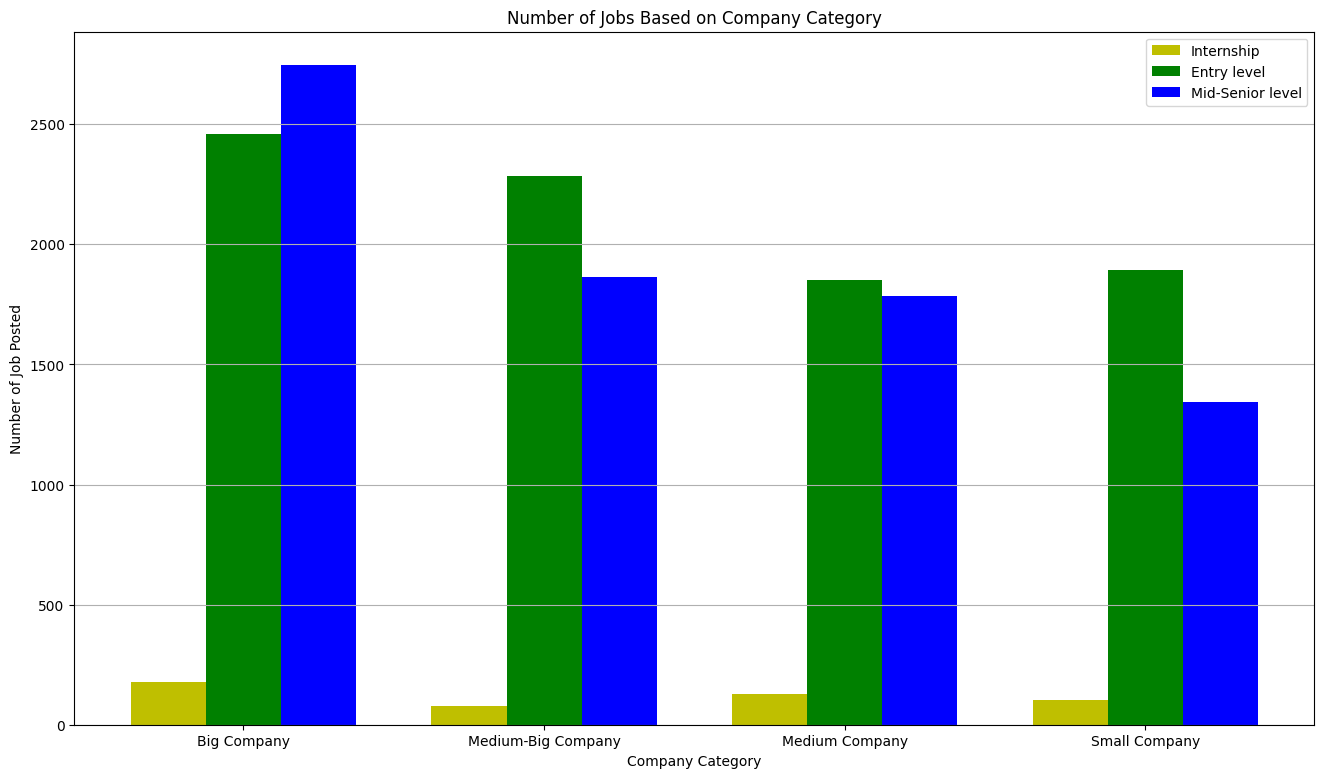

In [ ]:
N = 4
ind = np.arange(N)
width = 0.25

plt.figure(figsize=(16,9))
xvals = comp_group['Internship'].tolist()
bar1 = plt.bar(ind, xvals, width, color = 'y')

yvals = comp_group['Entry level'].tolist()
bar2 = plt.bar(ind+width, yvals, width, color='g')

zvals = comp_group['Mid-Senior level'].tolist()
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Company Category")
plt.ylabel('Number of Job Posted')
plt.title("Number of Jobs Based on Company Category")

plt.xticks(ind+width, comp_group.index.tolist())
plt.legend( (bar1, bar2, bar3), ('Internship', 'Entry level', 'Mid-Senior level') )
plt.grid(axis='y')
plt.show()

**Findings**

- Big Company has 5387 total job openings.
- Medium-Big Company has 4229 total job openings.
- Medium Company has 3766 total job openings.
- Small Company has 3342 total job openings.

Distribution of Job Openings by Experience Level:
- Entry-level positions is the most common across all company sizes, followed by Mid-Senior level positions, with internships being the least common.

Company Size Comparison:
- Big companies  have the highest total number of job openings, followed by medium-big, medium-sized, and small companies.

Internship Opportunities:
- Big companies offer the most internship opportunities, followed by medium-sized companies, medium-big companies, and small companies.

**Insight**

- Job seekers looking for entry-level positions may find more opportunities across different company sizes.
- Those interested in internships may have better chances at big companies.
- Professionals with mid-senior level experience may find more options in larger companies, but there are still opportunities in medium and small companies.

## Job Posted Based on Industries

In [ ]:
def clean_industries(x):
  return x.split(',')[0]



def simplefied_industries(x):
  if x in list_industries:
    return x
  else:
    return 'Other Industries'

In [ ]:
data['clean_industries'] = data['industries'].apply(clean_industries)

list_industries = data['clean_industries'].value_counts().head(n=15).index.tolist()
data['clean_industries'] = data['clean_industries'].apply(simplefied_industries)
data_industy = data.loc[data['clean_industries'] != 'Unidentified']

In [ ]:
data_industy['clean_industries'].value_counts().reset_index().drop([0], axis=0)

,index,clean_industries
1,IT Services and IT Consulting,3846
2,Software Development,2174
3,Technology,1588
4,Staffing and Recruiting,1375
5,Financial Services,699
6,Information Technology & Services,440
7,Business Consulting and Services,404
8,Internet Publishing,330
9,Appliances,323
10,Government Administration,321


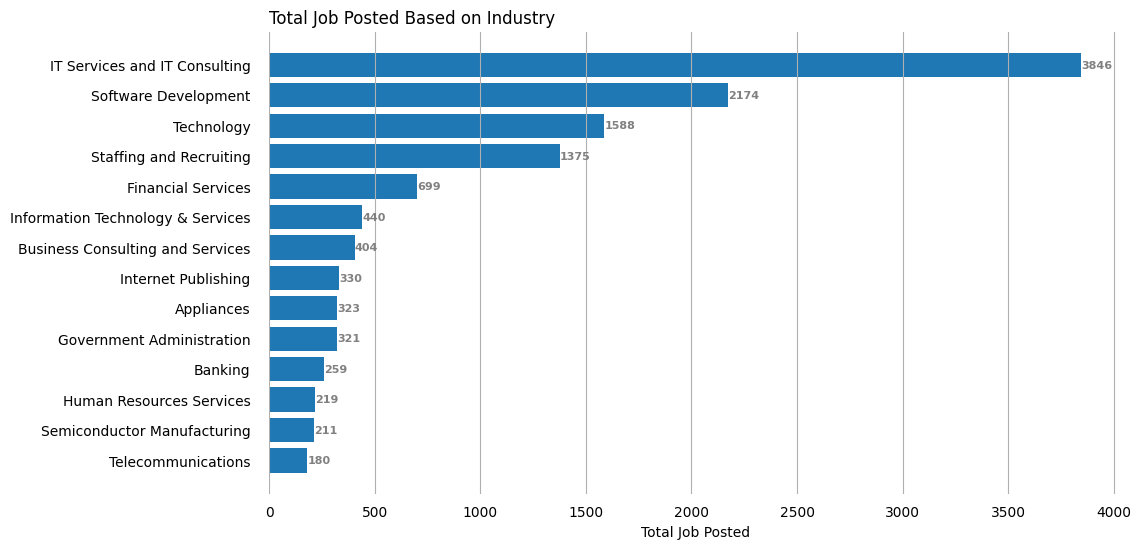

In [ ]:
ax = create_plot(data_industy['clean_industries'].value_counts().reset_index().drop([0], axis=0), x='index', y='clean_industries')

xtick = data_industy['clean_industries'].value_counts().reset_index().drop([0], axis=0)['index'].tolist()
ax.set_yticklabels((xtick))
ax.set_title('Total Job Posted Based on Industry', loc ='left', )
ax.set_xlabel('Total Job Posted')

plt.grid(axis='x')
plt.show()

## Which country got the most remote job

In [ ]:
place_group = data.loc[data['work_place'] != 'None'].groupby(['country', 'work_place']).count().unstack()['job_title']
place_group

work_place,Hybrid,Onsite,Remote
country,,,
Australia,1921,1947,460
Indonesia,486,1283,1288
Malaysia,687,2526,352
New Zealand,399,422,285
Singapore,1353,2996,189


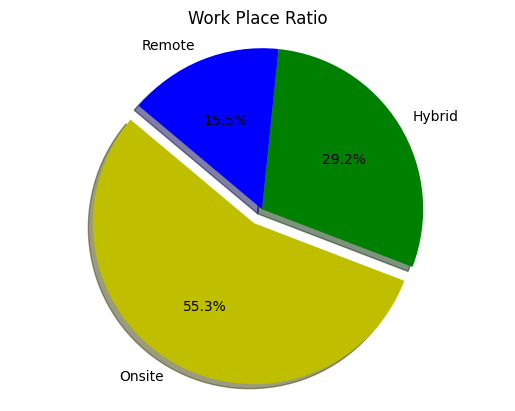

In [ ]:
# Data to plot

labels = 'Onsite', 'Hybrid', 'Remote'
sizes = data.loc[data['work_place']!= 'None']['work_place'].value_counts().tolist()
colors = ['y', 'g', 'b']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Work Place Ratio')
plt.show()

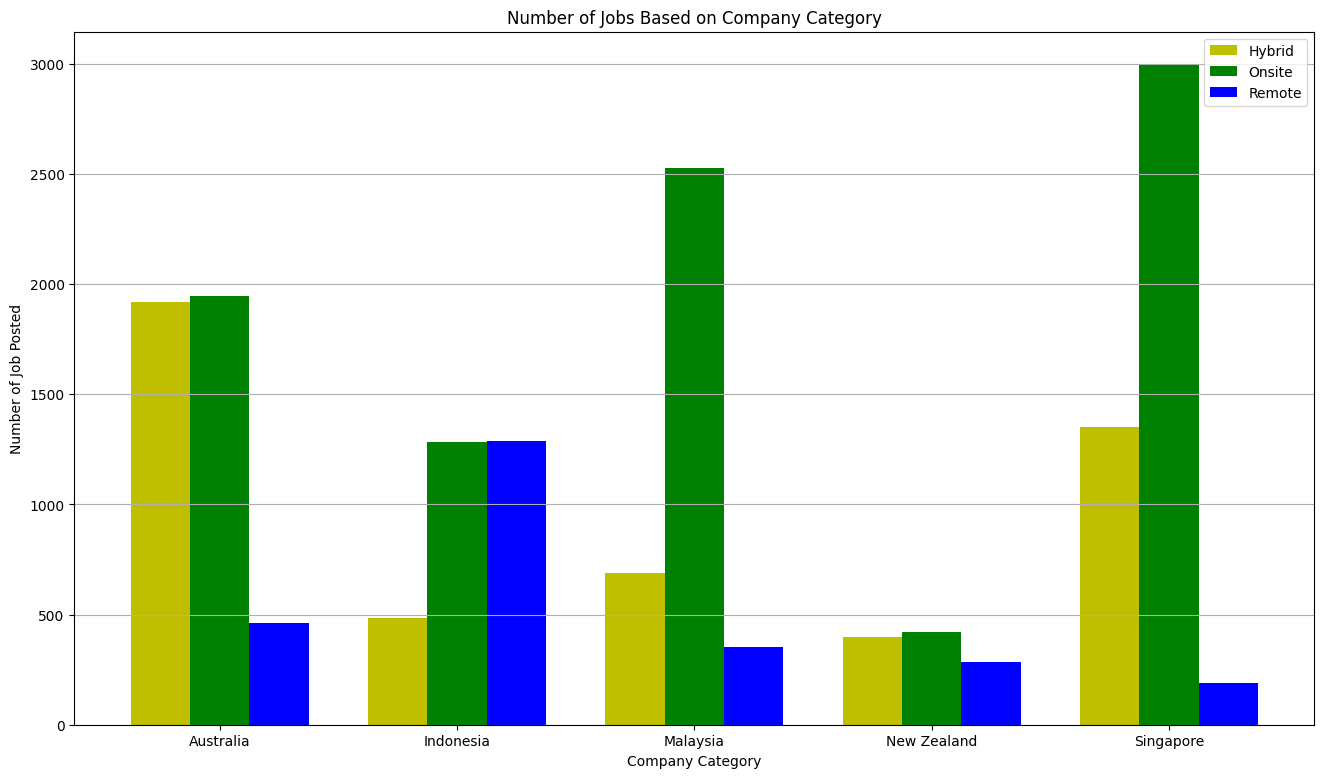

In [ ]:
N = 5
ind = np.arange(N)
width = 0.25

plt.figure(figsize=(16,9))
xvals = place_group['Hybrid'].tolist()
bar1 = plt.bar(ind, xvals, width, color = 'y')

yvals = place_group['Onsite'].tolist()
bar2 = plt.bar(ind+width, yvals, width, color='g')

zvals = place_group['Remote'].tolist()
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Company Category")
plt.ylabel('Number of Job Posted')
plt.title("Number of Jobs Based on Company Category")

plt.xticks(ind+width, place_group.index.tolist())
plt.legend( (bar1, bar2, bar3), ('Hybrid', 'Onsite', 'Remote') )
plt.grid(axis='y')
plt.show()

**Findings**

- Onsite job postings are the most common (9174), followed by hybrid (4846) and remote (2574) job postings.

**Insights**

- Hybrid job postings are relatively common in Australia, Indonesia, and Singapore, indicating that these countries have embraced flexible work arrangements in their job markets.
- Malaysia and Singapore show strong demand for onsite job postings, suggesting a preference for traditional office-based work in these countries.
- Remote job postings are relatively common in Indonesia and Australia, indicating a substantial number of remote work opportunities in these countries.

# EDA on Applicant Per-day

## Average Applicant Perday Based on Industries

In [ ]:
industry_group = data_industy.groupby('clean_industries').mean()['applicant_perday'].reset_index().sort_values(by='applicant_perday', ascending=False)
industry_group = industry_group.loc[industry_group['clean_industries']!= 'Other Industries']

In [ ]:
industry_group

,clean_industries,applicant_perday
0,Appliances,13.160804
2,Business Consulting and Services,9.995149
3,Financial Services,9.298769
14,Telecommunications,9.011558
13,Technology,8.907523
6,IT Services and IT Consulting,8.739539
1,Banking,8.350804
10,Semiconductor Manufacturing,7.374036
8,Internet Publishing,6.579579
11,Software Development,5.752931


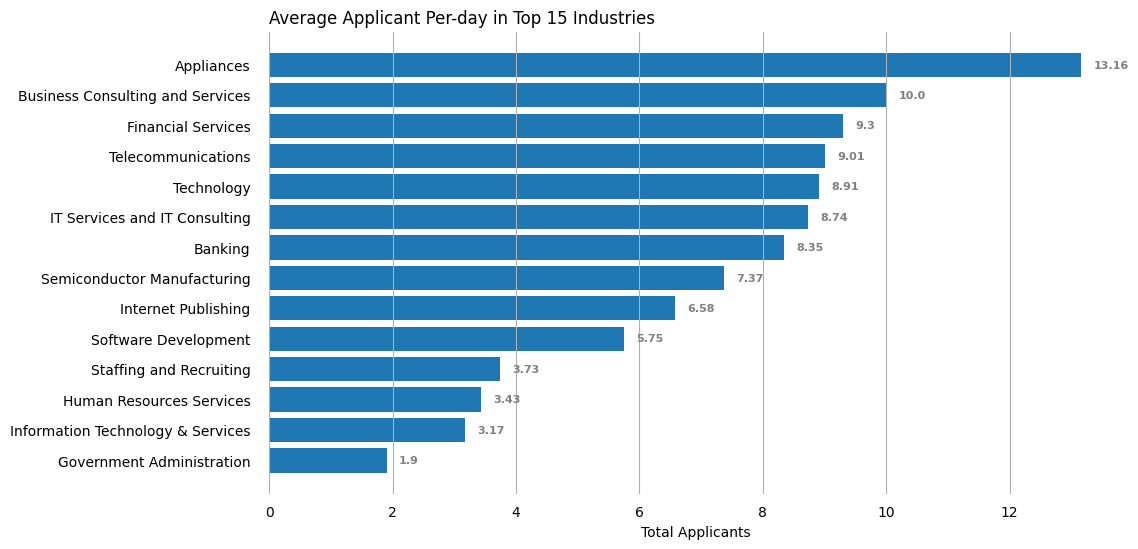

In [ ]:
ax = create_plot(industry_group, x='clean_industries', y='applicant_perday')

xtick = industry_group['clean_industries'].tolist()
ax.set_yticklabels((xtick))
ax.set_title('Average Applicant Per-day in Top 15 Industries', loc ='left', )
ax.set_xlabel('Total Applicants')

plt.grid(axis='x')
plt.show()

**Findings**    
    
- IT Services and IT Consulting is the industry with the highest number of job postings.
- Financial Services has a relatively high average applicant per-day, indicating that there is significant interest from job seekers in this industry.
- Semiconductor Manufacturing and Internet Publishing, despite having fewer job postings, have relatively high average applicant per-day figures.

**Insight**
- Appliances and Business Consulting and Services have the highest average applicant per-day, indicating strong interest among job seekers in these industries. In contrast, Government Administration has the lowest average applicant per-day, suggesting lower competition for job openings in this sector.
- IT Services and IT Consulting, despite having the highest number of job postings, doesn't have the highest average applicant per-day. This could imply that while there are many job openings in this field, there is also a relatively large pool of potential candidates, which might make it more competitive for applicants.

## Looking at Applicant perday based on Employment Type

In [ ]:
avg_applicant = data.loc[data['employment_type'] != 'Unidentified'].groupby('employment_type')['applicant_perday'].mean().reset_index().sort_values(by='applicant_perday', ascending=False)
avg_applicant

,employment_type,applicant_perday
2,Internship,21.582176
1,Full-time,7.716658
0,Contract,7.116166
4,Part-time,3.889753
3,Other,0.555182


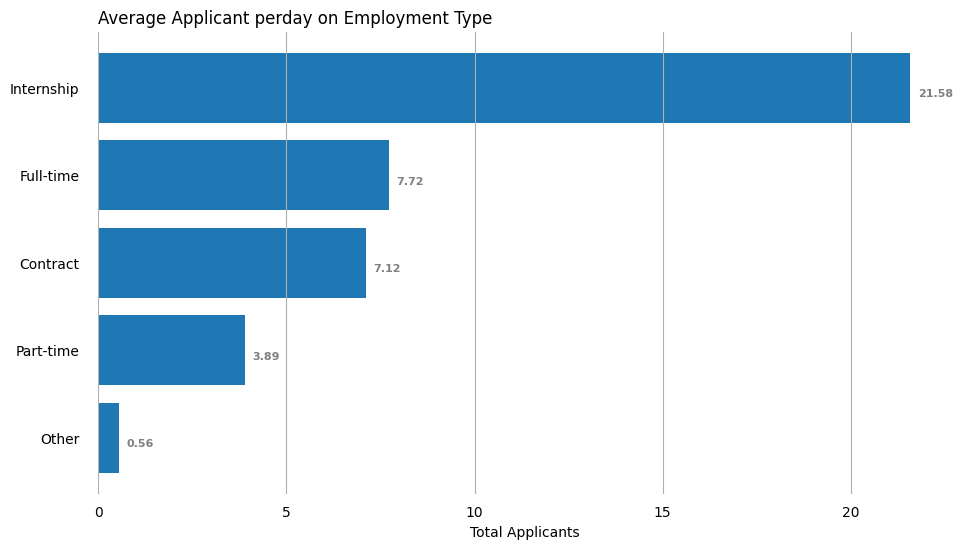

In [ ]:
ax = create_plot(avg_applicant, x='employment_type', y='applicant_perday')

xtick = ["Internship", "Full-time", "Contract", "Part-time", "Other"]
ax.set_yticklabels((xtick))
ax.set_title('Average Applicant perday on Employment Type', loc ='left', )
ax.set_xlabel('Total Applicants')

plt.grid(axis='x')
plt.show()

**Findings**

- The "Internship" category stands out prominently with an average of 21.77 applicants per day, surpassing the "Full-time" category with an average of 7.74 applicants per day.

**Insight**

With this graph that utilizes "applicant per day," we achieve a more balanced perspective of the total number of applicants. This is because some job postings may have been active for a longer duration, resulting in a higher total number of applicants. However, when we divide this total by the number of days since the job was posted, the "applicant per day" metric provides a more equitable comparison. Conversely, in cases where there are fewer total applicants, but the job posting is relatively new, the "applicant per day" metric may make the daily interest appear more substantial.

In summary, this analysis underscores the significance of considering the "applicant per day" metric when evaluating job seeker interest. It helps mitigate the impact of the job posting's age on the total number of applicants and offers a more balanced view of the attractiveness of different job categories. It's evident that "Internship" positions, with their high "applicant per day" rate, have strong appeal to job seekers, surpassing "Full-time" positions in this regard.

## Looking at Average Applicant Per-day on Seniority Level

In [ ]:
sen_level = data.groupby('seniority_level')['applicant_perday'].mean().reset_index().reindex([1,0,2])

In [ ]:
sen_level

,seniority_level,applicant_perday
1,Internship,18.807238
0,Entry level,6.967602
2,Mid-Senior level,8.308915


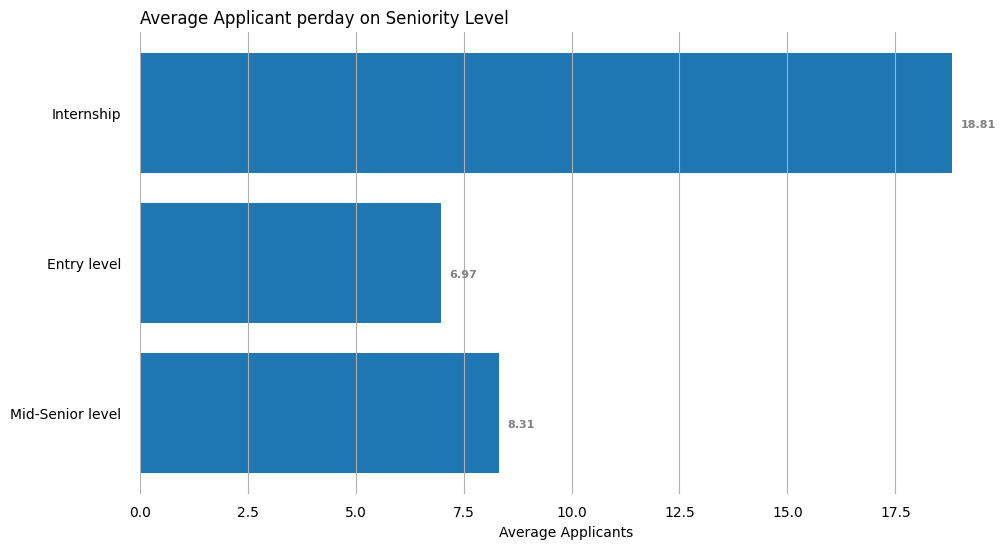

In [ ]:
ax = create_plot(sen_level, x='seniority_level', y='applicant_perday')

xtick = sen_level['seniority_level'].tolist()
ax.set_yticklabels((xtick))
ax.set_title('Average Applicant perday on Seniority Level', loc ='left', )
ax.set_xlabel('Average Applicants')

plt.grid(axis='x')
plt.show()

**Findings**

- Internship positions continue to stand out as the most attractive job category, with an average of approximately 18.93 applicants per day.
- Mid-Senior level positions receive an average of approximately 8.33 applicants per day. This indicates that there is a significant level of competition for roles that require a moderate level of experience and expertise.
- Although the average number of applicants for entry-level positions has decreased slightly to approximately 7.00 applicants per day, these roles remain competitive.

## Looking at Average Applicant Per-day on Company Category

In [ ]:
avg_comp = data.loc[data['comp_category'] != 'No Data'].groupby('comp_category')['applicant_perday'].mean().reset_index().sort_values(by='applicant_perday', ascending=False)
avg_comp

,comp_category,applicant_perday
0,Big Company,10.662806
2,Medium-Big Company,8.672032
1,Medium Company,7.890394
3,Small Company,5.592936


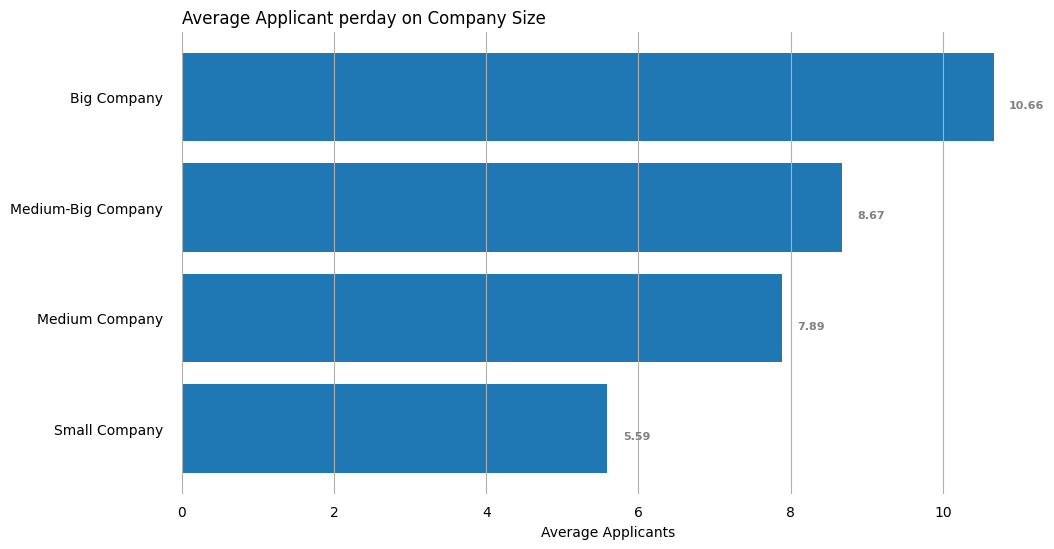

In [ ]:
ax = create_plot(avg_comp, x='comp_category', y='applicant_perday')

xtick = avg_comp['comp_category'].tolist()
ax.set_yticklabels((xtick))
ax.set_title('Average Applicant perday on Company Size', loc ='left', )
ax.set_xlabel('Average Applicants')

plt.grid(axis='x')
plt.show()

**Findings**

Company Size Affects Applicant Interest:

- Big companies receive the highest number of applicants per day. This suggests that job seekers are generally more interested in opportunities at larger, well-established firms.
- Medium-Big companies receive the second-highest number of applicants. This indicates that medium-sized firms also have a competitive advantage in attracting talent.
- Medium-sized companies receive an average of approximately 7.90 applicants per day, while small companies receive an average of approximately 5.61 applicants per day. These findings suggest that job seekers may be less inclined to apply to medium-sized and small companies, possibly due to perceived differences in stability or opportunities.


**Insight**
- Job seekers should be prepared for intense competition when applying to positions at big companies. The high number of applicants means that the selection process can be highly competitive.
- For those who want to work for well-established companies but prefer a less competitive job market, medium-big companies can be an attractive option.

# Hypothesis Testing

## Hypothesis Testing on Company Category

H0 (Null Hypothesis): The average number of applicants per day between big companies and other companies is the SAME.

H1 (Alternative Hypothesis): The average number of applicants per day between big companies and other companies is DIFFERENT.

In [ ]:
len(data[data['comp_category'] == 'Big Company']), len(data[data['comp_category'] != 'Big Company'])

(5387, 12923)

In [ ]:
big_comp = data.loc[(data['comp_category'] == 'Big Company') & (data['applicant_perday'] != 0)]['applicant_perday']
big_comp

2         29.200000
4         26.285714
5         11.600000
12       287.400000
13       346.000000
            ...    
18265      0.129032
18272      0.367347
18273      1.370370
18289      1.000000
18309      3.961538
Name: applicant_perday, Length: 5155, dtype: float64

In [ ]:
other_comp = data.loc[(data['comp_category'] != 'Big Company') & (data['applicant_perday'] != 0)]['applicant_perday']
other_comp

0          4.696970
1        126.000000
3          6.162162
6         11.983607
7        137.000000
            ...    
18304      0.076923
18305      0.038462
18306      4.000000
18307      4.000000
18308      2.605263
Name: applicant_perday, Length: 11564, dtype: float64

Since we need the same sample size, I will take randomly 5155 data from `other_comp` to match it size with `big_comp`

In [ ]:
other_comp = other_comp.sample(5155)
len(big_comp) , len(other_comp)

(5155, 5155)

In [ ]:
# check variance
print(f'variance Big Companies: {np.var(big_comp)}')
print(f'variance Other Companies: {np.var(other_comp)}')

variance Big Companies: 923.7675744625403
variance Other Companies: 629.1185117476122


In [ ]:
# check if the variance is equal
equal_variance = np.var(big_comp)/np.var(other_comp)

if equal_variance < 4:
    print('Variance is EQUAL')
else:
    print('Variance is NOT EQUAL')

Variance is EQUAL


In [ ]:
alpha = 0.05
result = st.ttest_ind(other_comp, big_comp, equal_var = True)

print(result.pvalue)
print()
if result.pvalue < alpha:
    print('H0 Rejected')
else:
    print('H0 Accepted')

8.314646138729913e-11

H0 Rejected


Based on the results of the hypothesis test, with a calculated p-value of approximately 2.96e-13, which is significantly smaller than the chosen significance level (alpha), we have strong statistical evidence to reject the null hypothesis (H0). Therefore, we can conclude the following:

- There is a statistically significant difference in the average number of applicants per day between big companies and other companies.

In other words, the data provide strong support for the alternative hypothesis (H1), indicating that the average number of applicants per day is not the same for big companies and other companies.

## Hypothesis Testing on Work Place

In light of the growing popularity of remote work arrangements, we want to explore whether this shift has had an impact on the number of job applicants received by companies. To investigate this, we are setting up a hypothesis test to analyze whether there is a statistically significant difference in the average number of daily job applicants between remote jobs and onsite jobs.

Null Hypothesis (H0): The average number of applicants per day for remote jobs is the SAME as the average for onsite jobs.

Alternative Hypothesis (H1): The average number of applicants per day for remote jobs is DIFFERENT from the average for onsite jobs.

In [ ]:
remote = data.loc[(data['work_place'] == 'Remote') & (data['applicant_perday'] != 0)]['applicant_perday']
remote

7        137.000000
22        39.622222
47        59.250000
51       171.200000
61         3.767123
            ...    
18299      0.272727
18300      0.272727
18303      0.038462
18304      0.076923
18305      0.038462
Name: applicant_perday, Length: 2136, dtype: float64

In [ ]:
onsite = data.loc[(data['work_place'] == 'Onsite') & (data['applicant_perday'] != 0)]['applicant_perday']
onsite

0         4.696970
2        29.200000
3         6.162162
5        11.600000
6        11.983607
           ...    
18292     0.750000
18293     0.875000
18294     2.083333
18295     0.523810
18306     4.000000
Name: applicant_perday, Length: 8447, dtype: float64

In [ ]:
len(remote), len(onsite)

(2136, 8447)

Since we need the same sample size, I will take randomly 2136 data from `onsite` to match it size with `remote`

In [ ]:
onsite = onsite.sample(2136)
len(onsite) == len(remote)

True

In [ ]:
# check variance
print(f'variance Remote Job: {np.var(remote)}')
print(f'variance Onsite Job: {np.var(onsite)}')

variance Remote Job: 830.6671402931561
variance Onsite Job: 516.7121159988328


In [ ]:
# check if the variance is equal
equal_variance = np.var(remote)/np.var(onsite)

if equal_variance < 4:
    print('Variance is EQUAL')
else:
    print('Variance is NOT EQUAL')

Variance is EQUAL


In [ ]:
alpha = 0.05
result = st.ttest_ind(remote, onsite, equal_var = True)

print(result.pvalue)
print()
if result.pvalue < alpha:
    print('H0 Rejected')
else:
    print('H0 Accepted')

0.5522454596697888

H0 Accepted


There is no statistically significant difference in the average number of applicants per day between remote jobs and onsite jobs.

In other words, the data does not provide strong support for the alternative hypothesis (H1), indicating that, based on the sample data and the chosen significance level, there is no meaningful difference in the number of daily job applicants between remote and onsite job postings. This suggests that the work arrangement (remote or onsite) does not appear to be a significant factor influencing the number of job applicants received.

# Conclusion

Job Posting Trends:
- It's clear that job postings are highest from Monday to Thursday, with a peak on Thursday. Therefore, job seekers should focus their efforts on weekdays to maximize their chances of finding suitable positions.

Total Applicants based on Employment Type:
- The competition for full-time positions is intense, so applicants should emphasize their relevant skills and experiences. However, don't overlook internship, contract, or part-time roles, especially for gaining experience or exploring new industries.

Applicants per Day based on Employment Type:
- The "applicant per day" metric provides a fairer comparison of job seeker interest. Internship positions are particularly appealing to job seekers, surpassing full-time positions in terms of daily interest.

Seniority Level Distribution based on Company Size:
- Entry-level positions are common across all company sizes. Job seekers with mid-senior level experience may find more options in larger companies, but opportunities exist in medium and small companies as well.

Job Postings by Industry:
- IT Services and IT Consulting have the highest number of job postings, but financial services and semiconductor manufacturing also attract significant job seeker interest. Job seekers should consider industries like Appliances and Business Consulting and Services, which have high average applicant per-day figures.

Work Type Distribution:
- Onsite job postings are the most common, but hybrid and remote work opportunities are also prevalent. The preference for different work types varies by country, with some embracing flexible arrangements more than others.

**Recommendations:**

- Job seekers should tailor their job search strategies based on the day of the week. Focusing efforts on weekdays, especially Thursday, is advisable.

- Emphasize relevant skills and experiences when applying for full-time positions due to high competition. However, consider internships or part-time roles for gaining experience.

- Pay attention to the "applicant per day" metric to gauge job seeker interest accurately.

- Explore opportunities across various company sizes, as entry-level positions are available in companies of all sizes.

- Consider industries with high applicant interest, such as Appliances and Business Consulting and Services.

## Save dataset

In [ ]:
data.head()

,job_title,company_name,date_posted,date_scraped,seniority_level,employment_type,work_place,industries,state,country,company_size,company_followers,total_applicants,applicant_perday,day_of_week,comp_category,clean_industries
0,Data Science Trainee,Algoritma Data Science School,2023-07-01,2023-08-03,Internship,Full-time,Onsite,Education Administration Programs,DKI Jakarta,Indonesia,11-50 Employee,11560,155,4.696970,5,Small Company,Other Industries
1,Data Intelligence Intern,SIRCLO,2023-08-02,2023-08-03,Internship,Full-time,Hybrid,IT Services and IT Consulting,Banten,Indonesia,1001-5000 Employee,67415,126,126.000000,2,Medium-Big Company,IT Services and IT Consulting
2,Business Analyst (intern),Kawan Lama Group,2023-07-24,2023-08-03,Internship,Internship,Onsite,Retail,DKI Jakarta,Indonesia,10001+ Employee,150260,292,29.200000,0,Big Company,Other Industries
3,Business Intelligence Analyst Intern,Flash Coffee,2023-06-27,2023-08-03,Internship,Internship,Onsite,"Technology, Information and Internet",DKI Jakarta,Indonesia,501-1000 Employee,30563,228,6.162162,1,Medium-Big Company,Technology
4,Data Scientist Intern,Amartha,2023-07-27,2023-08-03,Internship,Full-time,Hybrid,Financial Services,DKI Jakarta,Indonesia,5001-10000 Employee,64041,184,26.285714,3,Big Company,Financial Services


In [ ]:
#data.to_csv('/content/gdrive/MyDrive/WEB SCRAPING 101/Data Cleaned_new_after_eda.csv')